In [1]:
%run twisted_graphene.py

In [2]:
a=2.46
s3=np.sqrt(3)
a1=a*np.array([s3/2,-1/2,0.0])
a2=a*np.array([s3/2,1/2,0.0])

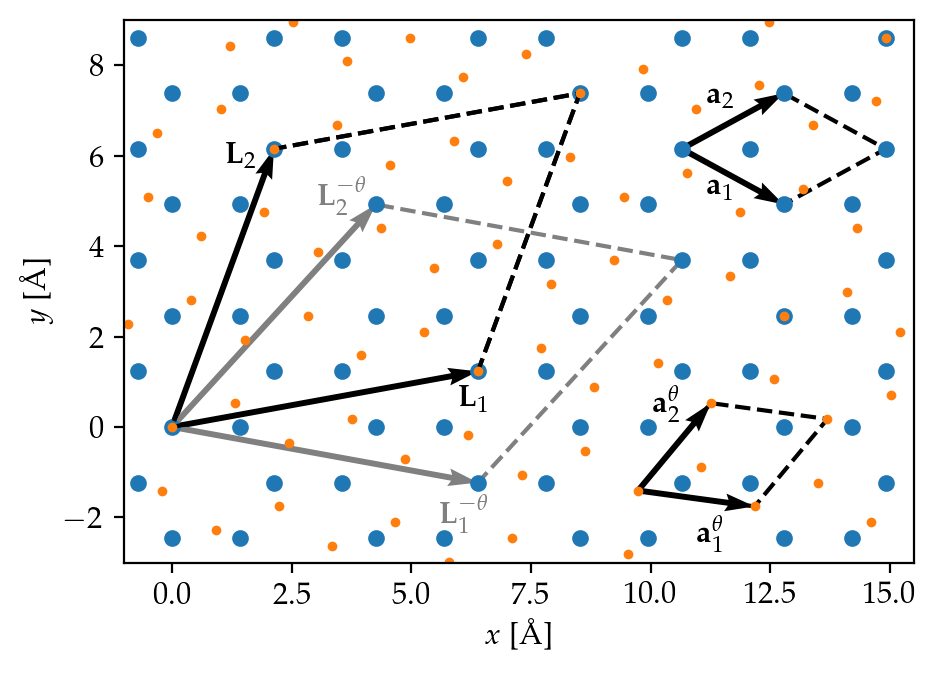

In [4]:
xmin,xmax=-1.0,15.5
ymin,ymax=-3.0,9.0

height=3.5
width=(xmax-xmin)/(ymax-ymin) * height

plt.figure(figsize=(width,height))

p,q=1,1
r,L1,L2=superlattice(p,q)
N=number_of_sublattice_positions(p,q)
vertices=np.array([[0,0,0],L1,L1+L2,L2,[0,0,0]])
rotated_vertices=vertices@rot(-twist_angle(p,q)).T

m1,n1=0,5
layer1_vertices=np.array([[0,0,0],a1,a1+a2,a2,[0,0,0]])+m1*a1+n1*a2

m2,n2=4,0
a1t=rot(twist_angle(p,q))@a1
a2t=rot(twist_angle(p,q))@a2
layer2_vertices=np.array([[0,0,0],a1t,a1t+a2t,a2t,[0,0,0]])+m2*a1t+n2*a2t

plt.plot(vertices[:,0],vertices[:,1],'k--')
plt.plot(rotated_vertices[:,0],rotated_vertices[:,1],'--',color='gray')
plt.plot(layer1_vertices[:,0],layer1_vertices[:,1],'k--')
plt.plot(layer2_vertices[:,0],layer2_vertices[:,1],'k--')

unit_cell_index_max=3

for m in range(-unit_cell_index_max,unit_cell_index_max+1):
    for n in range(-unit_cell_index_max,unit_cell_index_max+1):
        translation=m*L1+n*L2
        rr=r+translation
        plt.plot(rr[0:N,0],rr[0:N,1],'.',ms=10,color='tab:blue')
        plt.plot(rr[N:2*N,0],rr[N:2*N,1],'.',ms=10,color='tab:blue')

plt.plot(vertices[:,0],vertices[:,1],'k--')
for m in range(-unit_cell_index_max,unit_cell_index_max+1):
    for n in range(-unit_cell_index_max,unit_cell_index_max+1):
        translation=m*L1+n*L2
        rr=r+translation
        plt.plot(rr[2*N:3*N,0],rr[2*N:3*N,1],'.',ms=5,color='tab:orange')
        plt.plot(rr[3*N::,0],rr[3*N::,1],'.',ms=5,color='tab:orange')

#vetores primitivos supercélula
origin=np.zeros(3)
x0=origin[0]
y0=origin[1]
vectors=np.array([[x0,y0,L1[0],L1[1]],[x0,y0,L2[0],L2[1]]]) #[x0,y0,lx,ly]
X,Y,U,V=zip(*vectors)
plt.quiver(X,Y,U,V,angles='xy', scale_units='xy', scale=1, color=['black', 'black'])
plt.annotate('$\\mathbf{L}_1$',(L1[0]-0.4,L1[1]-0.8))
plt.annotate('$\\mathbf{L}_2$',(L2[0]-1.0,L2[1]-0.3))        

#vetores primitivos supercélula rotacionados de -theta
L1t=rot(-twist_angle(p,q))@L1
L2t=rot(-twist_angle(p,q))@L2
origin=np.zeros(3)
x0=origin[0]
y0=origin[1]
vectors=np.array([[x0,y0,L1t[0],L1t[1]],[x0,y0,L2t[0],L2t[1]]]) #[x0,y0,lx,ly]
X,Y,U,V=zip(*vectors)
plt.quiver(X,Y,U,V,angles='xy', scale_units='xy', scale=1, color=['gray', 'gray'])
plt.annotate('$\\mathbf{L}_1^{-\\theta}$',(L1t[0]-0.8,L1t[1]-0.9),color='gray')
plt.annotate('$\\mathbf{L}_2^{-\\theta}$',(L2t[0]-1.2,L2t[1]),color='gray')        


#vetores primitivos camada 1
origin=5*a2
x0=origin[0]
y0=origin[1]
vectors=np.array([[x0,y0,a1[0],a1[1]],[x0,y0,a2[0],a2[1]]]) #[x0,y0,lx,ly]
X,Y,U,V=zip(*vectors)
plt.quiver(X,Y,U,V,angles='xy', scale_units='xy', scale=1, color=['black', 'black'])
plt.annotate('$\\mathbf{a}_1$',((origin+a1)[0]-1.6,(origin+a1)[1]+0.2))
plt.annotate('$\\mathbf{a}_2$',((origin+a2)[0]-1.6,(origin+a2)[1]-0.2))

#vetores primitivos camada 2 (rotacionada)
origin=4*a1t
x0=origin[0]
y0=origin[1]
vectors=np.array([[x0,y0,a1t[0],a1t[1]],[x0,y0,a2t[0],a2t[1]]]) #[x0,y0,lx,ly]
X,Y,U,V=zip(*vectors)
plt.quiver(X,Y,U,V,angles='xy', scale_units='xy', scale=1, color=['black', 'black'])
plt.annotate('$\\mathbf{a}_1^{\\theta}$',((origin+a1t)[0]-1.2,(origin+a1t)[1]-0.8))
plt.annotate('$\\mathbf{a}_2^{\\theta}$',((origin+a2t)[0]-1.2,(origin+a2t)[1]-0.2))

plt.xlabel('$x$ [Å]')
plt.ylabel('$y$ [Å]')

plt.xlim((xmin,xmax))
plt.ylim((ymin,ymax))

plt.savefig('Fig05_graphene_twisted_unit_cell.svg')

plt.show()